## Assignment 2: Predicting Health Impacts from Air Quality Factors
In this assignment, we will use a (synthetic) data set looking at how health impacts are related to air quality factors. This data set is available at [https://www.kaggle.com/datasets/rabieelkharoua/air-quality-and-health-impact-dataset](https://www.kaggle.com/datasets/rabieelkharoua/air-quality-and-health-impact-dataset). The data includes public health outcomes and how they are related to air quality and meteorological factors.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Download the data from Kaggle

In [2]:
# To facilitate downloading data from Kaggle, we can install this python package
!pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/air-quality-and-health-impact-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\gbles\.cache\kagglehub\datasets\rabieelkharoua\air-quality-and-health-impact-dataset\versions\1


In [4]:
os.listdir(path)

['air_quality_health_impact_data.csv']

## Part 1: Data exploration

1. Load in the csv file as a dataframe using `pandas`.

In [5]:
aq = pd.read_csv(os.path.join(path,'air_quality_health_impact_data.csv'))

In [6]:
aq.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


2. Check whether there are any NaN's in the dataframe

In [7]:
aq.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [8]:
aq.isna().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

3. Make a histogram of the different numerical variables in the dataframe

In [9]:
import seaborn as sns

<Axes: ylabel='Count'>

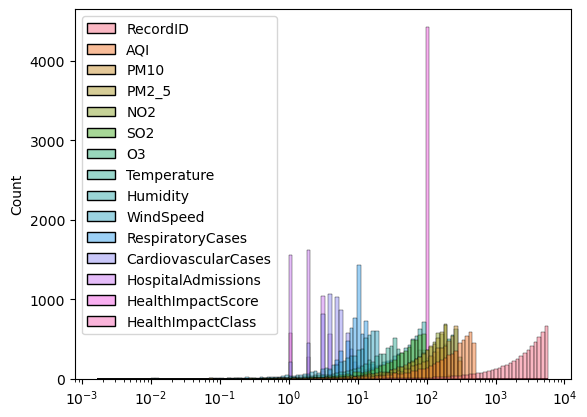

In [17]:
sns.histplot(aq, log_scale=True)

4. There are two possible targets in the dataframe. One is a categorical variable `HealthImpactClass`, and the other is a numerical variable `HealthImpactScore`. Create numpy arrays, one named `y_classification`, containing the `HealthImpactClass`, and one named `y_regression`, containing the `HealthImpactScore`. 

In [11]:
y_classification = aq['HealthImpactClass'].to_numpy()
y_regression = aq['HealthImpactScore'].to_numpy()

5. Check how balanced the 5 classes are in `HealthImpactClass`.

In [12]:
aq['HealthImpactClass'].value_counts()

HealthImpactClass
0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: count, dtype: int64

6. Create a numpy array called `features` that includes the following 9 variables:
   - AQI
   - PM10
   - PM2_5
   - NO2
   - SO2
   - O3
   - Temperature
   - Humidity
   - WindSpeed

In [14]:
features = aq[['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed']].to_numpy()

## Part 2: Preprocessing

7. Create two python lists, one including the class names, and the other including the feature names. The classification of health impact is derived from the health impact score, using the following thresholds:
- 0: 'Very High' (HealthImpactScore >= 80)
- 1: 'High' (60 <= HealthImpactScore < 80)
- 2: 'Moderate' (40 <= HealthImpactScore < 60)
- 3: 'Low' (20 <= HealthImpactScore < 40)
- 4: 'Very Low' (HealthImpactScore < 20)

In [53]:
classnames = ['Very High', 'High', 'Moderate', 'Low','Very Low']
features_nam = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed']

8. Use the `StandardScaler` method to scale the numerical variables in the `feature` array, and save this as a numpy array `X`

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(features)

In [23]:
X

array([[-0.42253543,  1.71777463, -1.5008217 , ..., -0.67844813,
         1.13947529, -0.66674514],
       [ 1.56749487,  1.13897098, -1.55339493, ..., -0.92751603,
        -0.30460725, -0.94655941],
       [ 0.81206333, -0.7493402 , -1.32742698, ..., -0.95333425,
        -1.42090471,  0.20223592],
       ...,
       [ 0.45869678, -1.24589677,  1.45433797, ...,  0.55242113,
         1.45852774, -1.22903787],
       [-0.27878253,  0.19697242,  1.70340497, ...,  1.45804319,
        -1.11230526,  0.12693174],
       [-1.14094577, -0.77532806,  0.33988608, ...,  0.22535772,
         0.85782428,  1.11160649]])

## Part 3: Training, validation, and test split

9. Split the data into training, validation, and test data sets, with 80% of the data used for training, and 10% each for validation and testing. Create separate regression and classification targets, using `y_classification` and `y_regression`.

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X,y_classification,train_size=0.8,test_size=0.2, random_state= 42)
X_class, X_test_class, y_class, y_test_class = train_test_split(X_test_class, y_test_class, test_size=.5, random_state=42)

In [27]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y_regression,train_size=0.8,test_size=0.2, random_state= 42)
X_reg, X_test_reg, y_reg, y_test_reg = train_test_split(X_test_reg, y_test_reg, test_size=.5, random_state=42)

## Part 4: Train a Random Forest Classifier

10. Train a `RandomForestClassifier` with 120 estimators and with a maximum depth of 10. Set the class_weight to "balanced", since the classes are imbalanced. You can use the default values for other hyperparmameters.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rnd_clf = RandomForestClassifier(n_estimators=120,max_depth=10,class_weight="balanced", random_state=42)

In [31]:
rnd_clf.fit(X_train_class,y_train_class)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=120,
                       random_state=42)

11. Create a heatmap plot for the confusion matrix showing the performance of the trained classifier on the validation data set. Label the heatmap with the `classnames` on the x and y axis.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

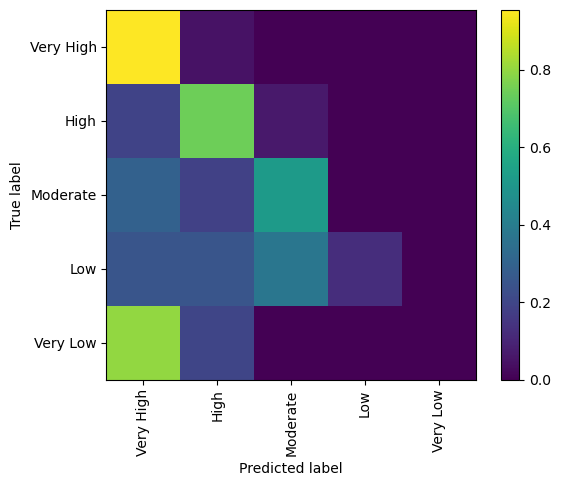

In [33]:
cmp = ConfusionMatrixDisplay.from_estimator(rnd_clf,X_class,y_class,normalize='true',
                                      display_labels=classnames, xticks_rotation="vertical",include_values=False);

Because the classes are imbalanced, the confusion matrix shows that the classifier does not perform that well on the classes that are not well-represented in the data. One way to improve this is to use over-sampling to augment the data set. Using the `imbalanced-learn` library, we can use the `SMOTE` algorithm [(https://arxiv.org/pdf/1106.1813)](https://arxiv.org/pdf/1106.1813) to oversample the data set, using the lines of code below.

In [25]:
!pip install imbalanced-learn

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train_class, y_train_class)

12. Train a new random forest classifier using `X_resampled` and `y_resampled`. Use the same hyperparameters as your original random forest.

In [36]:
rnd_clf.fit(X_resampled,y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=120,
                       random_state=42)

13. Create a new heatmap plot for the confusion matrix showing the performance of the classifier that was trained on the oversampled data set, evaluated on the validation data set. Label the heatmap with the `classnames` list on the x and y axis.

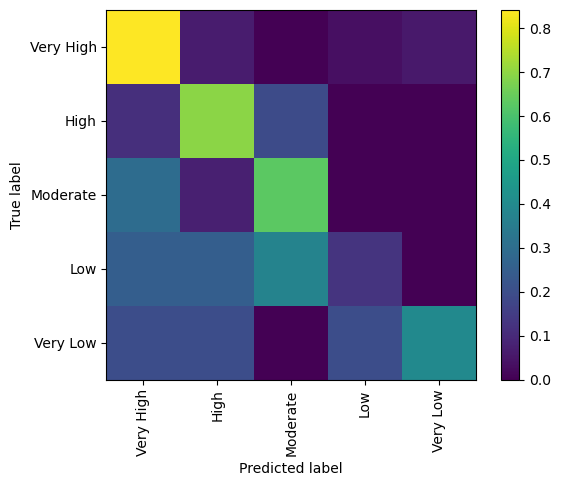

In [37]:
cmp = ConfusionMatrixDisplay.from_estimator(rnd_clf,X_class,y_class,normalize='true',
                                      display_labels=classnames, xticks_rotation="vertical",include_values=False);

## Part 5: Train a Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

14. Train a `RandomForestRegressor` on the training data set, using the regression target. Set the number of estimators to 120 and the maximum tree depth to 10. You can use the other default hyperparameters.

In [43]:
from sklearn.metrics import r2_score

In [40]:
rnd_reg = RandomForestRegressor(n_estimators=120,max_depth=10, random_state=42)

In [42]:
rnd_reg.fit(X_train_reg,y_train_reg)

RandomForestRegressor(max_depth=10, n_estimators=120, random_state=42)

15. Using your trained `RandomForestRegressor`, predict the target values for the validation data set and calculate the coefficient of determination between the true targets and the values predicted by the `RandomForestRegressor`.

In [44]:
y_pred = rnd_reg.predict(X_test_reg)

In [45]:
r2 = r2_score(y_test_reg,y_pred)

In [46]:
r2

0.9452180883008101

16. Make a barplot of the feature importance in your trained random forest. Label the x-axis with the feature names.

In [47]:
rnd_reg.feature_importances_

array([0.62156337, 0.08251639, 0.16371875, 0.03441913, 0.00517376,
       0.07916562, 0.0044491 , 0.00466527, 0.00432861])

In [52]:
features_nam

['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity']

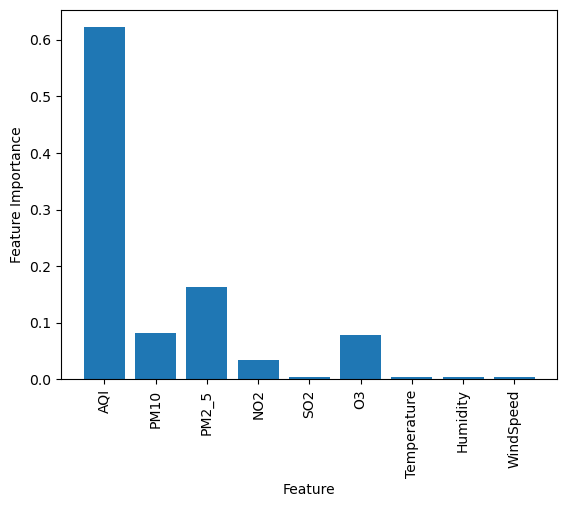

In [54]:
x = plt.bar(features_nam,rnd_reg.feature_importances_)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()

17.  What are the 4 most important features in terms of determining the health impact score? Print them out.

In [55]:
import numpy as np

In [57]:
rnd_reg.feature_importances_[::-1][:4]

array([0.00432861, 0.00466527, 0.0044491 , 0.07916562])

In [58]:
top_features = np.argsort(rnd_reg.feature_importances_)

In [62]:
sorted_indices = top_features[::-1]

for i in sorted_indices[:4]:
    print(f"{features_nam[i]} — Importance Score: {top_features[i]:.4f}")


AQI — Importance Score: 8.0000
PM2_5 — Importance Score: 7.0000
PM10 — Importance Score: 6.0000
O3 — Importance Score: 5.0000
